In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [1]:
adult_dataset_path = "adult.csv"

def load_adult_data(adult_path=adult_dataset_path):
    csv_path = os.path.join(adult_path)
    return pd.read_csv(csv_path)

In [3]:
df = load_adult_data()
df.head(3)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K


In [4]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  32561
Columns  :  15

Features : 
 ['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'income']

Missing values :   0

Unique values :  
 age                  73
workclass             9
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       42
income                2
dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [8]:
df_check_missing_workclass = (df['workclass']=='?').sum()
df_check_missing_workclass

1836

In [9]:
df_check_missing_occupation = (df['occupation']=='?').sum()
df_check_missing_occupation

1843

In [10]:
df_missing = (df=='?').sum()
df_missing

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [11]:
percent_missing = (df=='?').sum() * 100/len(df)
percent_missing

age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.000000
native.country    1.790486
income            0.000000
dtype: float64

In [12]:
df.apply(lambda x: x !='?',axis=1).sum()

age               32561
workclass         30725
fnlwgt            32561
education         32561
education.num     32561
marital.status    32561
occupation        30718
relationship      32561
race              32561
sex               32561
capital.gain      32561
capital.loss      32561
hours.per.week    32561
native.country    31978
income            32561
dtype: int64

In [13]:
df = df[df['workclass'] !='?']
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [14]:
df_categorical = df.select_dtypes(include=['object'])
df_categorical.apply(lambda x: x=='?',axis=1).sum()

workclass           0
education           0
marital.status      0
occupation          7
relationship        0
race                0
sex                 0
native.country    556
income              0
dtype: int64

In [15]:
df = df[df['occupation'] !='?']
df = df[df['native.country'] !='?']

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
age               30162 non-null int64
workclass         30162 non-null object
fnlwgt            30162 non-null int64
education         30162 non-null object
education.num     30162 non-null int64
marital.status    30162 non-null object
occupation        30162 non-null object
relationship      30162 non-null object
race              30162 non-null object
sex               30162 non-null object
capital.gain      30162 non-null int64
capital.loss      30162 non-null int64
hours.per.week    30162 non-null int64
native.country    30162 non-null object
income            30162 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [17]:
from sklearn import preprocessing
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K
5,Private,HS-grad,Divorced,Other-service,Unmarried,White,Female,United-States,<=50K
6,Private,10th,Separated,Adm-clerical,Unmarried,White,Male,United-States,<=50K


In [18]:
le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,2,11,6,3,1,4,0,38,0
3,2,5,0,6,4,4,0,38,0
4,2,15,5,9,3,4,0,38,0
5,2,11,0,7,4,4,0,38,0
6,2,0,5,0,4,4,1,38,0


In [19]:
df = df.drop(df_categorical.columns,axis=1)
df = pd.concat([df,df_categorical],axis=1)
df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,82,132870,9,0,4356,18,2,11,6,3,1,4,0,38,0
3,54,140359,4,0,3900,40,2,5,0,6,4,4,0,38,0
4,41,264663,10,0,3900,40,2,15,5,9,3,4,0,38,0
5,34,216864,9,0,3770,45,2,11,0,7,4,4,0,38,0
6,38,150601,6,0,3770,40,2,0,5,0,4,4,1,38,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
age               30162 non-null int64
fnlwgt            30162 non-null int64
education.num     30162 non-null int64
capital.gain      30162 non-null int64
capital.loss      30162 non-null int64
hours.per.week    30162 non-null int64
workclass         30162 non-null int64
education         30162 non-null int64
marital.status    30162 non-null int64
occupation        30162 non-null int64
relationship      30162 non-null int64
race              30162 non-null int64
sex               30162 non-null int64
native.country    30162 non-null int64
income            30162 non-null int64
dtypes: int64(15)
memory usage: 3.7 MB


In [21]:
df['income'] = df['income'].astype('category')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
age               30162 non-null int64
fnlwgt            30162 non-null int64
education.num     30162 non-null int64
capital.gain      30162 non-null int64
capital.loss      30162 non-null int64
hours.per.week    30162 non-null int64
workclass         30162 non-null int64
education         30162 non-null int64
marital.status    30162 non-null int64
occupation        30162 non-null int64
relationship      30162 non-null int64
race              30162 non-null int64
sex               30162 non-null int64
native.country    30162 non-null int64
income            30162 non-null category
dtypes: category(1), int64(14)
memory usage: 3.5 MB


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = df.drop('income',axis=1)
y = df['income']

In [25]:
X.head(3)

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country
1,82,132870,9,0,4356,18,2,11,6,3,1,4,0,38
3,54,140359,4,0,3900,40,2,5,0,6,4,4,0,38
4,41,264663,10,0,3900,40,2,15,5,9,3,4,0,38


In [26]:
y.head(3)

1    0
3    0
4    0
Name: income, dtype: category
Categories (2, int64): [0, 1]

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=99)
X_train.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country
24351,42,289636,9,0,0,46,2,11,2,13,0,4,1,38
15626,37,52465,9,0,0,40,1,11,4,7,1,4,1,38
4347,38,125933,14,0,0,40,0,12,2,9,0,4,1,19
23972,44,183829,13,0,0,38,5,9,4,0,1,4,0,38
26843,35,198841,11,0,0,35,2,8,0,12,3,4,1,38


In [28]:
from sklearn.tree import DecisionTreeClassifier
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [29]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

y_pred_default = dt_default.predict(X_test)
print(classification_report(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91      6867
           1       0.78      0.52      0.63      2182

    accuracy                           0.85      9049
   macro avg       0.82      0.74      0.77      9049
weighted avg       0.84      0.85      0.84      9049



In [30]:
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[6553  314]
 [1038 1144]]
0.8505912255497845


In [32]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus,graphviz

features = list(df.columns[1:])
features

/opt/conda/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


['fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country',
 'income']

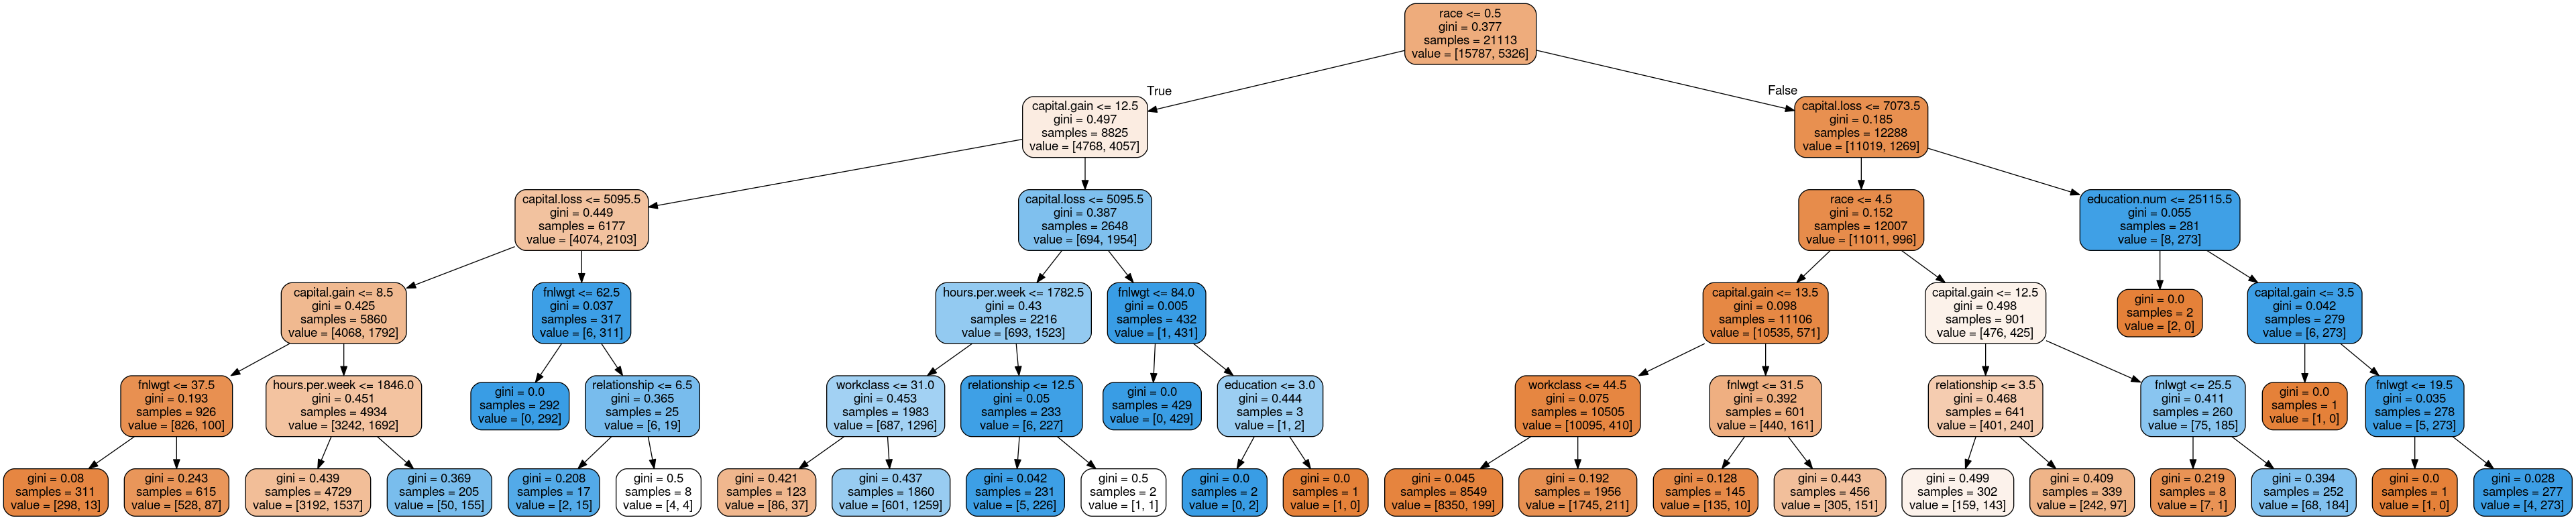

In [34]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [35]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
n_folds = 5
parameters = {'max_depth': range(1, 40)}
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(1, 40)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=

In [36]:
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013396,0.000632,0.002289,0.000077,1,{'max_depth': 1},0.747633,0.747810,0.747750,0.747750,0.747750,0.747738,0.000058,39
1,0.020650,0.000721,0.002585,0.000070,2,{'max_depth': 2},0.812027,0.818849,0.820464,0.825675,0.822833,0.819969,0.004590,16
2,0.026334,0.000252,0.002494,0.000046,3,{'max_depth': 3},0.828362,0.834478,0.834439,0.836570,0.837518,0.834273,0.003188,12
3,0.032663,0.000179,0.002555,0.000051,4,{'max_depth': 4},0.832386,0.841108,0.842492,0.842729,0.842255,0.840193,0.003944,9
4,0.038361,0.000191,0.002559,0.000027,5,{'max_depth': 5},0.834044,0.847975,0.847229,0.842729,0.847466,0.843888,0.005272,7


In [38]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_folds = 5

parameters = {'min_samples_leaf': range(5, 200, 20)}

dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Fal

In [39]:
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.089932,0.001484,0.003079,0.000134,5,{'min_samples_leaf': 5},0.826705,0.827137,0.819517,0.826149,0.818806,0.823663,0.003695,10
1,0.075429,0.000998,0.002885,0.000082,25,{'min_samples_leaf': 25},0.840672,0.849396,0.839413,0.842018,0.849360,0.844172,0.004330,6
2,0.069292,0.002509,0.002822,0.000080,45,{'min_samples_leaf': 45},0.842803,0.850580,0.846518,0.851018,0.851729,0.848529,0.003391,1
3,0.064849,0.001231,0.002795,0.000029,65,{'min_samples_leaf': 65},0.840909,0.854369,0.845334,0.851492,0.838465,0.846114,0.006054,2
4,0.063291,0.001843,0.002785,0.000034,85,{'min_samples_leaf': 85},0.837831,0.850580,0.845334,0.851492,0.842018,0.845451,0.005151,4


In [41]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_folds = 5

parameters = {'min_samples_split': range(5, 200, 20)}

dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_split': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Fa

In [42]:
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.097296,0.001128,0.003089,0.000046,5,{'min_samples_split': 5},0.808949,0.811508,0.818333,0.811701,0.808385,0.811775,0.003537,10
1,0.092044,0.002086,0.003167,0.000325,25,{'min_samples_split': 25},0.824574,0.828795,0.830175,0.822596,0.827570,0.826742,0.002778,9
2,0.088207,0.001850,0.002975,0.000045,45,{'min_samples_split': 45},0.837358,0.840635,0.830175,0.827333,0.838702,0.834841,0.005156,8
3,0.085938,0.000758,0.003078,0.000290,65,{'min_samples_split': 65},0.841856,0.846555,0.837518,0.833728,0.843913,0.840714,0.004575,7
4,0.084400,0.001154,0.002905,0.000031,85,{'min_samples_split': 85},0.847775,0.853895,0.838939,0.837281,0.845334,0.844645,0.006044,6


In [44]:
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    4.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                      

In [45]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.047459,0.002952,0.002560,0.000043,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.834044,0.844187,0.840360,0.845097,0.845334,0.841804,0.004273,13
1,0.046124,0.000434,0.002545,0.000037,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.834044,0.844187,0.840360,0.845097,0.845334,0.841804,0.004273,13
2,0.045717,0.000457,0.002580,0.000074,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.834044,0.842766,0.840360,0.845097,0.845808,0.841614,0.004241,15
3,0.045961,0.000535,0.002599,0.000055,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.834044,0.842766,0.840360,0.845097,0.845808,0.841614,0.004241,15
4,0.074791,0.000582,0.002760,0.000028,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.842330,0.851764,0.847229,0.854334,0.853861,0.849903,0.004545,3
5,0.074224,0.000680,0.002752,0.000041,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.842330,0.851764,0.847229,0.854334,0.853861,0.849903,0.004545,3
6,0.069409,0.000379,0.002742,0.000031,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.844934,0.852711,0.847466,0.854098,0.845571,0.848956,0.003752,5
7,0.070990,0.002794,0.002718,0.000024,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.844934,0.852711,0.847466,0.854098,0.845571,0.848956,0.003752,5
8,0.037624,0.000155,0.002568,0.000051,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.834044,0.847975,0.847466,0.845097,0.847466,0.844409,0.005279,9
9,0.037756,0.000273,0.002660,0.000157,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.834044,0.847975,0.847466,0.845097,0.847466,0.844409,0.005279,9


In [46]:
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8514659214701843
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [47]:
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [48]:
clf_gini.score(X_test,y_test)

0.850922753895458

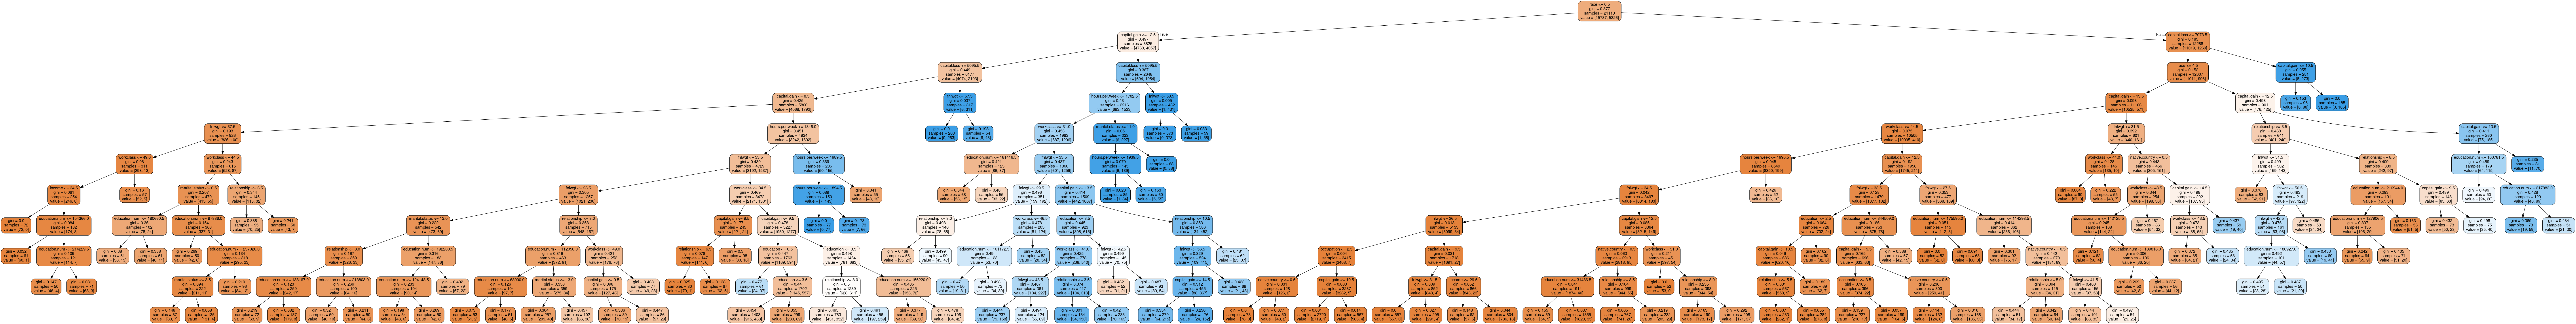

In [49]:
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

- You can see that this tree is too complex to understand. Let's try reducing the max_depth and see how the tree looks.

In [50]:
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

print(clf_gini.score(X_test,y_test))

0.8393192617968837


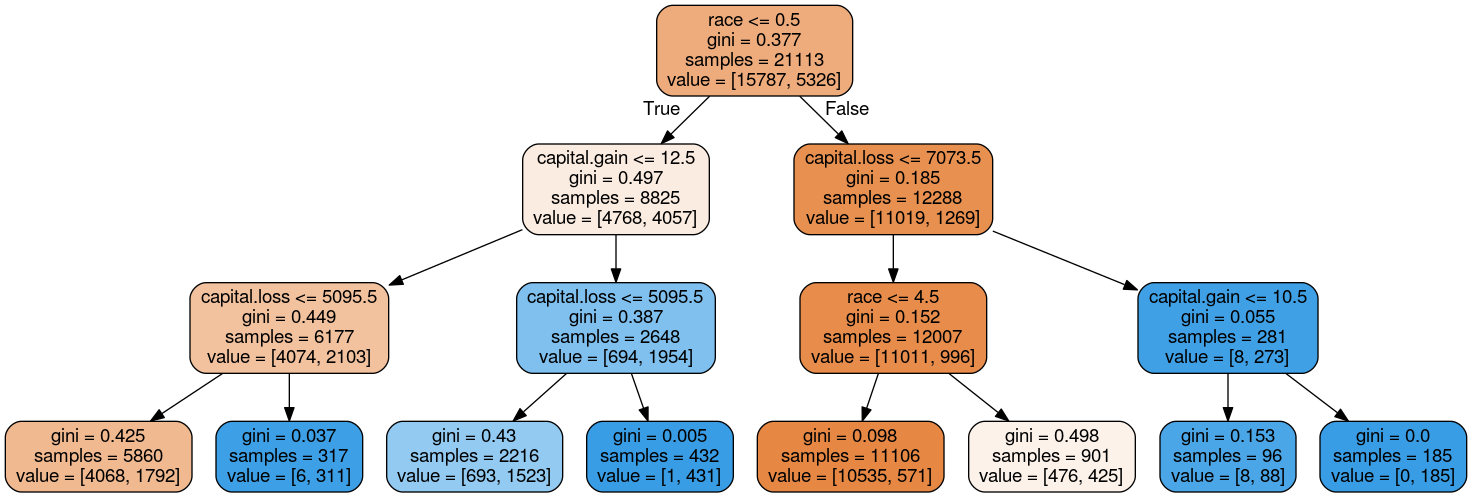

In [51]:
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [52]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      6867
           1       0.77      0.47      0.59      2182

    accuracy                           0.84      9049
   macro avg       0.81      0.71      0.74      9049
weighted avg       0.83      0.84      0.82      9049



In [53]:
print(confusion_matrix(y_test,y_pred))

[[6564  303]
 [1151 1031]]
